In [1]:
import numpy as np
seed_ = 20200218
np.random.seed(seed_)

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
color_palette = sns.color_palette("muted")
sns.set_palette(color_palette)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.callbacks import EarlyStopping

from PIL import Image
from PIL import ImageOps

In [2]:
df = pd.read_csv("./data/train.csv")
X = df.iloc[:, 1:]
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# reshape (num_img, h, w, num_channel)
X_ = X.values.reshape(X.values.shape[0], 28, 28, 1)

# normalization
X_ = X_/255

In [4]:
y = df['label']
onehot_y  = pd.get_dummies(y).values
onehot_y

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

# Split Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_, onehot_y, test_size=0.3, random_state=seed_)

In [6]:
X_train.shape, X_test.shape

((29400, 28, 28, 1), (12600, 28, 28, 1))

In [7]:
y_train.shape, y_test.shape

((29400, 10), (12600, 10))

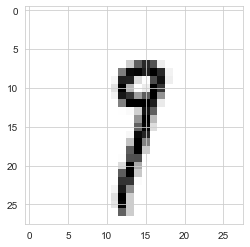

In [8]:
plt.imshow(X_train[0][:, :, 0], cmap="Greys")

# Model

## LeNet5

conv(5x5) - MaxPool(2x2 s=2) - conv(5x5) - MaxPool(2x2 s=2) - flatten 

[img url](https://anatomiesofintelligence.github.io/posts/2019-07-25-lenet5-digit-recognition-convolutional-neural-network)

In [9]:
model = Sequential()

model.add(Conv2D(6, kernel_size=(3, 3), input_shape=(28, 28, 1), padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# FC
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               51328     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
735/735 [==============================] - 2s 3ms/step - loss: 0.3371 - accuracy: 0.8964 - val_loss: 0.1078 - val_accuracy: 0.9667
Epoch 2/20
735/735 [==============================] - 2s 3ms/step - loss: 0.0885 - accuracy: 0.9727 - val_loss: 0.0796 - val_accuracy: 0.9752
Epoch 3/20
735/735 [==============================] - 2s 3ms/step - loss: 0.0604 - accuracy: 0.9819 - val_loss: 0.0575 - val_accuracy: 0.9823
Epoch 4/20
735/735 [==============================] - 2s 3ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0591 - val_accuracy: 0.9818
Epoch 5/20
735/735 [==============================] - 2s 3ms/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0569 - val_accuracy: 0.9827
Epoch 6/20
735/735 [==============================] - 2s 3ms/step - loss: 0.0269 - accuracy: 0.9914 - val_loss: 0.0479 - val_accuracy: 0.9857
Epoch 7/20
735/735 [==============================] - 2s 3ms/step - loss: 0.0222 - accuracy: 0.9931 - val_loss: 0.0624 - val_accuracy: 0.9847
Epoch 

In [11]:
predicted_ytrain = model.predict(X_train)
predicted_ytest = model.predict(X_test)

In [12]:
predicted_ytrain.shape

(29400, 10)

In [13]:
model.predict_classes(X_train)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 5, 8, ..., 3, 1, 2], dtype=int64)

In [14]:
np.argmax(predicted_ytrain, axis=1)

array([9, 5, 8, ..., 3, 1, 2], dtype=int64)

# 
## Model Evaluation

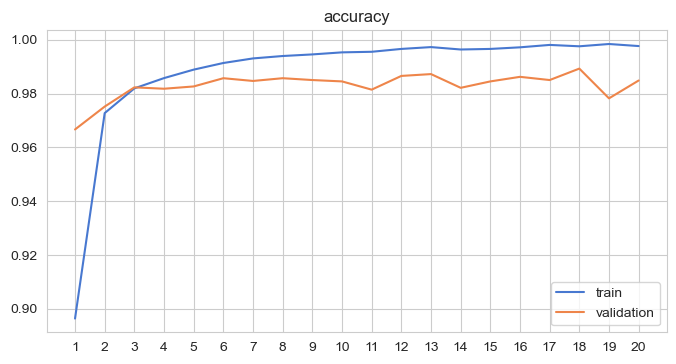

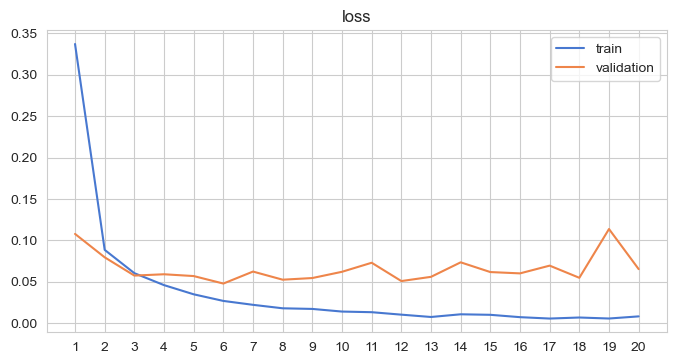

In [15]:
epoch_x = np.arange(1, len(history.history['accuracy'])+1)

plt.figure(figsize=(8, 4), dpi=100)
sns.lineplot(epoch_x, history.history['accuracy'], label='train')
sns.lineplot(epoch_x, history.history['val_accuracy'], label='validation')
plt.title('accuracy')
plt.xticks(epoch_x)
plt.show()

plt.figure(figsize=(8, 4), dpi=100)
sns.lineplot(epoch_x, history.history['loss'], label='train')
sns.lineplot(epoch_x, history.history['val_loss'], label='validation')
plt.title('loss')
plt.xticks(epoch_x)
plt.show()

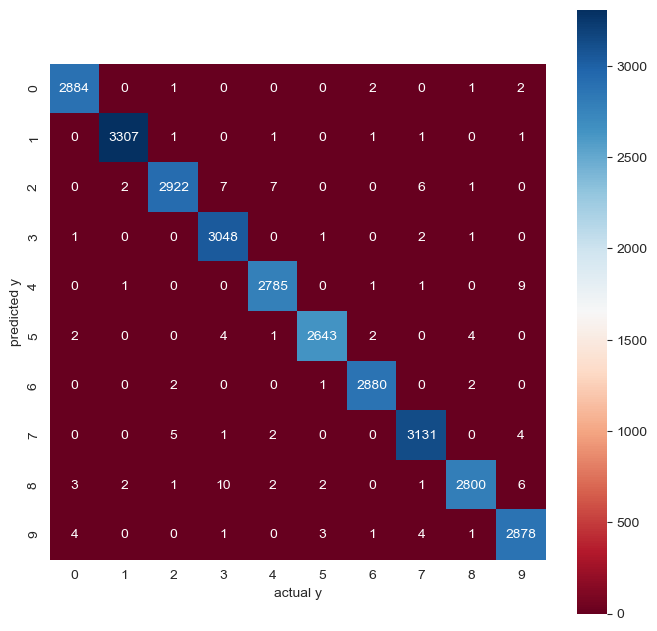

In [16]:
confusion_mat = confusion_matrix(np.argmax(y_train, axis=1), model.predict_classes(X_train))

plt.figure(figsize=(8, 8), dpi=100)
sns.heatmap(confusion_mat, square=True, annot=True, cmap='RdBu', fmt="d")
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.show()

# 
## Visaulize Result

In [17]:
train_df = pd.DataFrame(X_train.squeeze().reshape(X_train.squeeze().shape[0], 28*28))
train_df['label'] = np.argmax(y_train, axis=1)

test_df = pd.DataFrame(X_test.squeeze().reshape(X_test.squeeze().shape[0], 28*28))
test_df['label'] = np.argmax(y_test, axis=1)

In [18]:
train_df['predicted_label'] = np.argmax(predicted_ytrain, axis=1)
test_df['predicted_label'] = np.argmax(predicted_ytest, axis=1)

In [19]:
train_df[train_df['label'] != train_df['predicted_label']]

,0,1,2,3,4,5,6,7,8,9,...,776,777,778,779,780,781,782,783,label,predicted_label
270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,3
1198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,4
1336,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,3
1423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4
1715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,1
28917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,6
28969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,9
29041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,6


In [20]:
def plot_img(img_px, actual_label, predicted_label):
    fig = plt.figure(figsize=(5, 5), dpi=100)
    plt.imshow(img_px, cmap='Greys')
    
    plt.title(f"{actual_label=:.0f}, {predicted_label=:.0f}")
    plt.show()

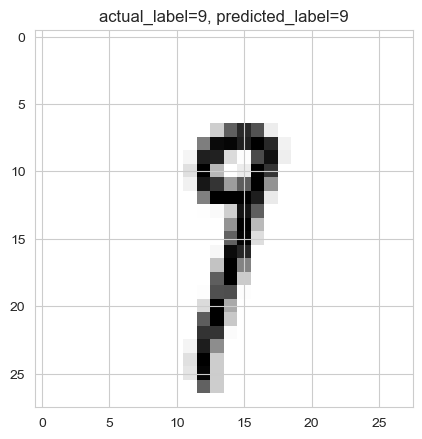

In [21]:
plot_img(train_df.iloc[0, 0:784].values.reshape(28, 28), train_df.iloc[0]['label'], train_df.iloc[0]['predicted_label'])

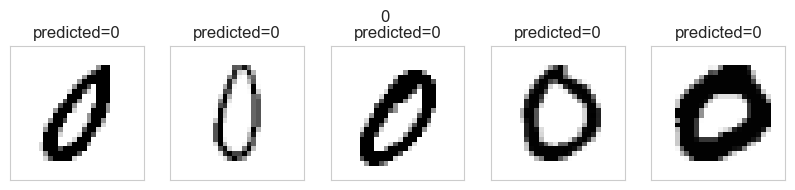

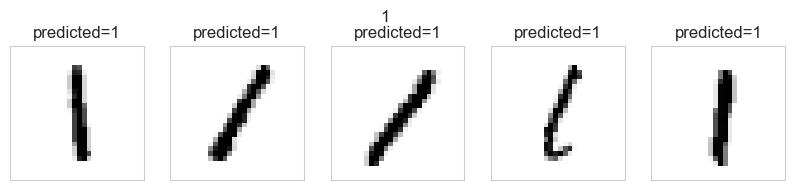

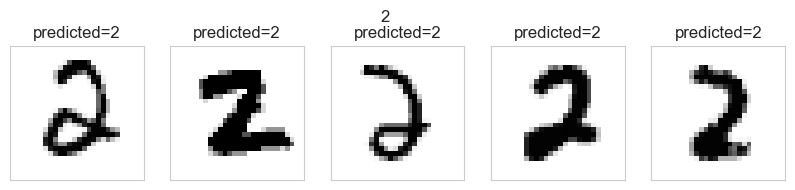

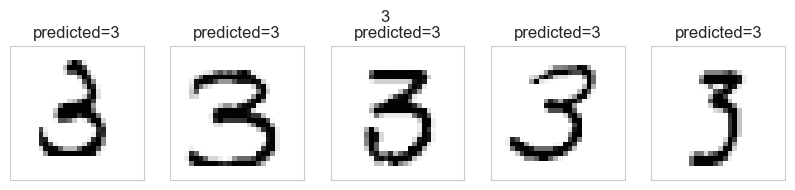

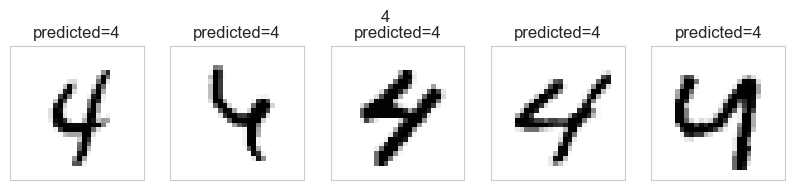

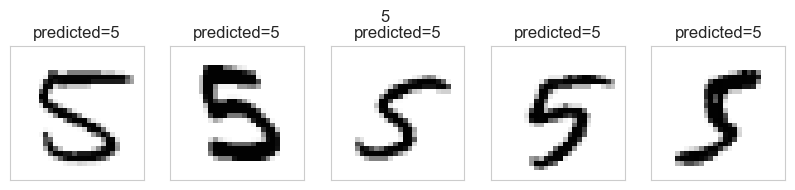

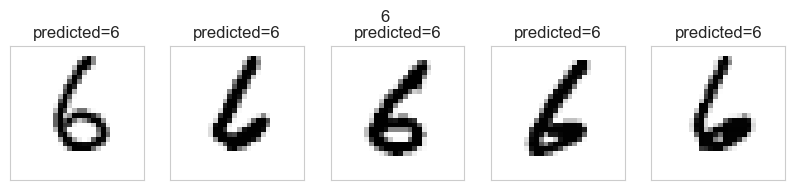

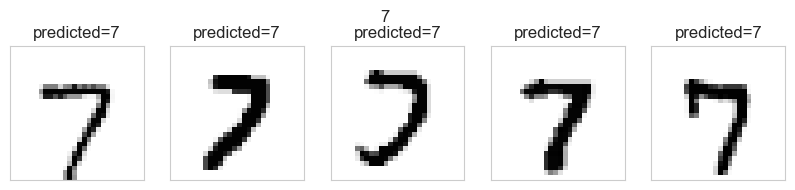

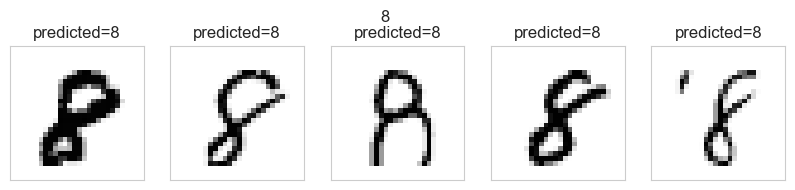

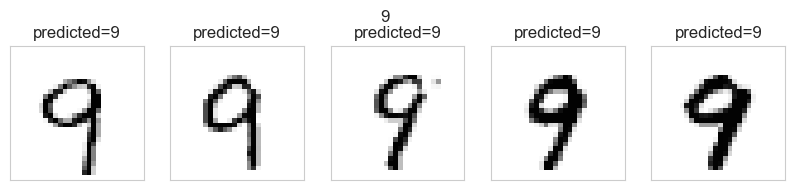

In [22]:
for digit in range(0, 10):
    true_positive = train_df[(train_df['label'] == train_df['predicted_label']) & (train_df['label'] == digit)].sample(5)
    
    fig, axes = plt.subplots(1, 5, dpi=100, figsize=(10, 2))
    fig.subplots_adjust(top=0.8)
    for i, ax in enumerate(axes):
        ax.imshow(true_positive.iloc[i, 0:784].values.reshape(28, 28), cmap='Greys')
        ax.set_title(f"predicted={true_positive.iloc[i]['predicted_label']:.0f}")
        plt.suptitle(digit)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

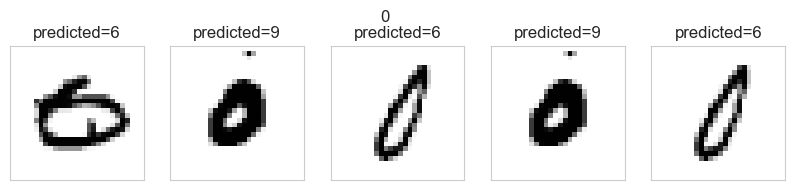

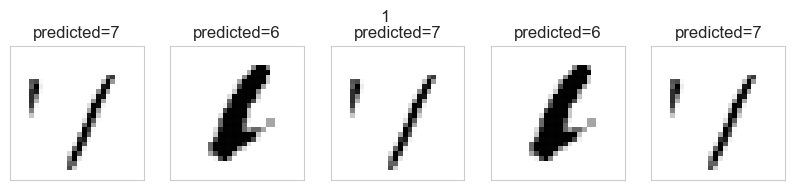

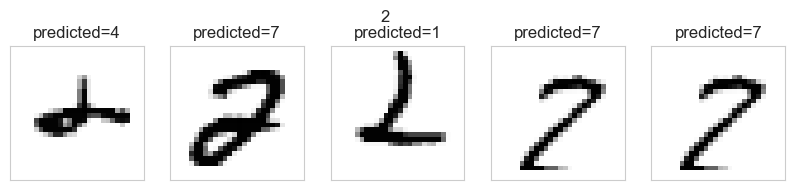

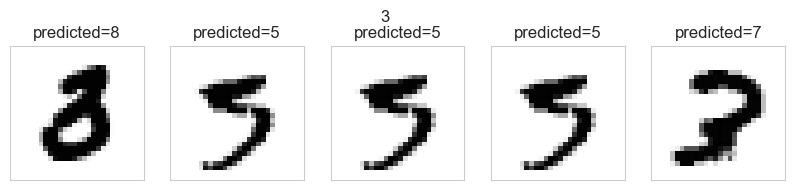

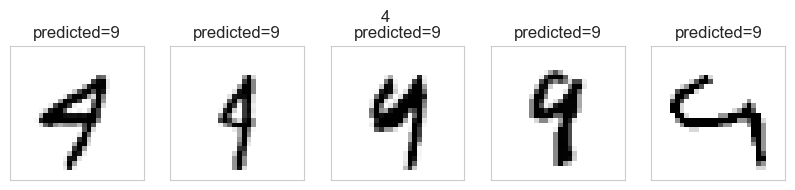

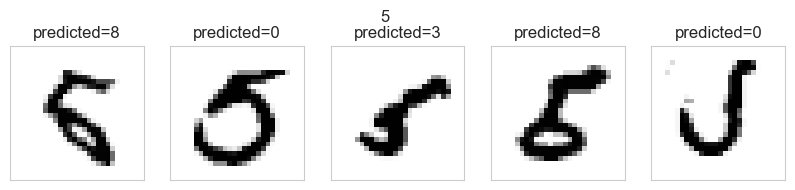

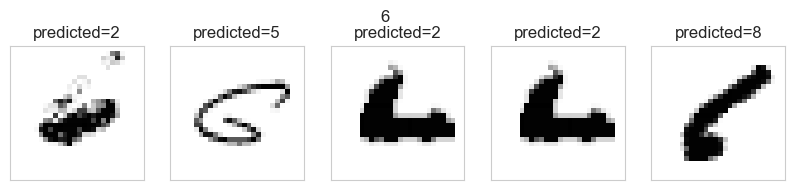

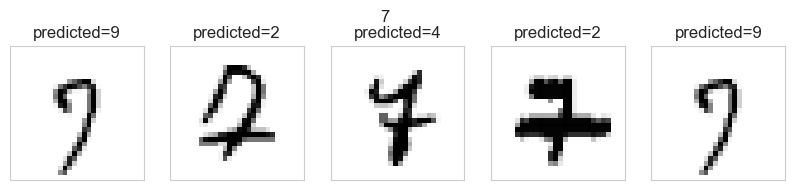

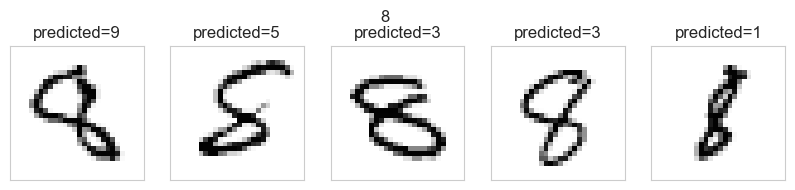

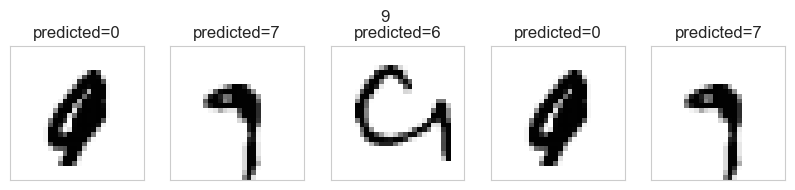

In [23]:
for digit in range(0, 10):
    err = train_df[(train_df['label'] != train_df['predicted_label']) & (train_df['label'] == digit)].sample(5, replace=True)
    
    fig, axes = plt.subplots(1, 5, dpi=100, figsize=(10, 2))
    fig.subplots_adjust(top=0.8)
    for i, ax in enumerate(axes):
        ax.imshow(err.iloc[i, 0:784].values.reshape(28, 28), cmap='Greys')
        ax.set_title(f"predicted={err.iloc[i]['predicted_label']:.0f}")
        plt.suptitle(digit)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

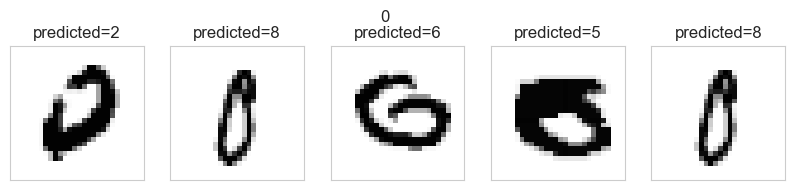

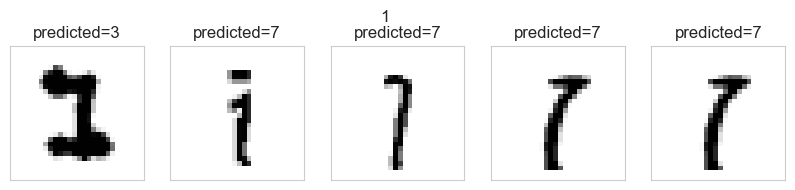

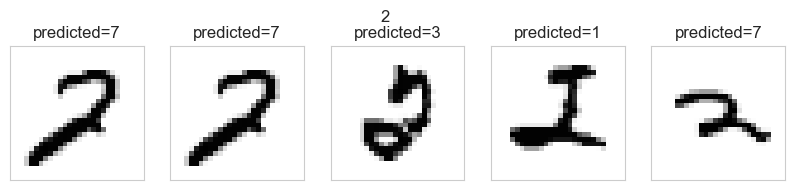

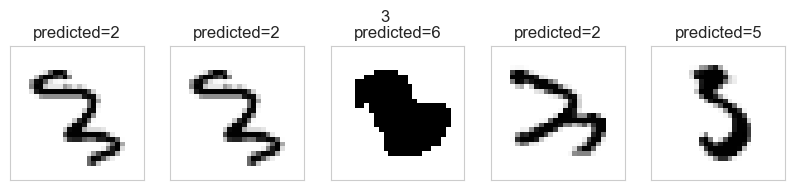

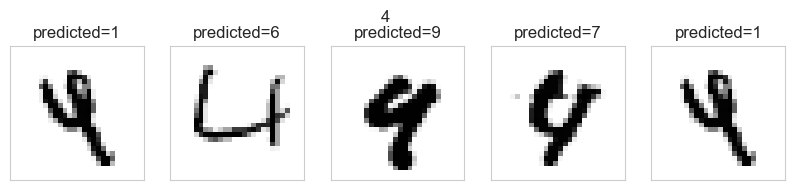

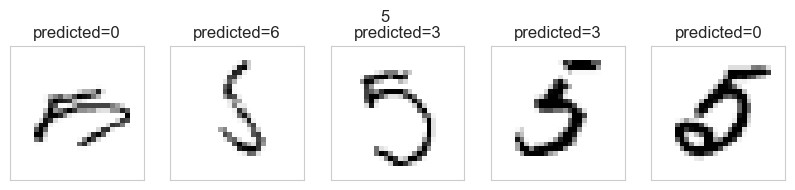

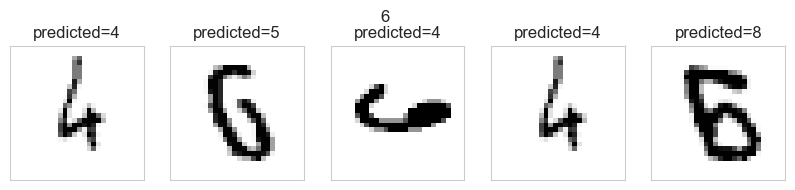

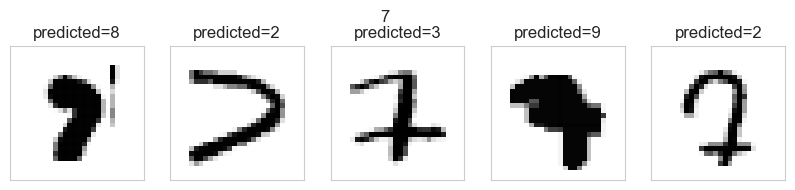

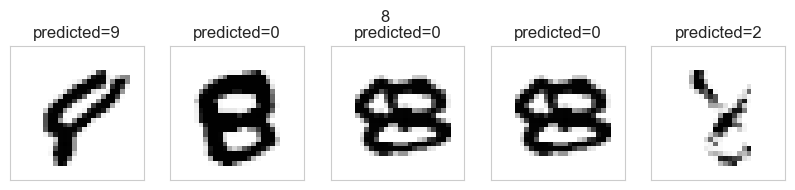

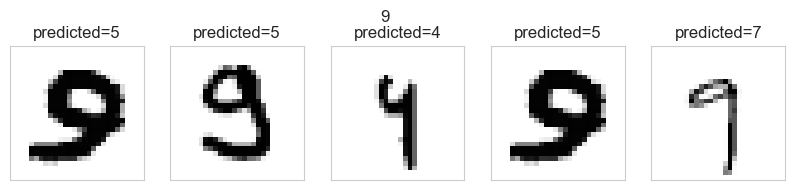

In [24]:
for digit in range(0, 10):
    err = test_df[(test_df['label'] != test_df['predicted_label']) & (test_df['label'] == digit)].sample(5, replace=True)
    
    fig, axes = plt.subplots(1, 5, dpi=100, figsize=(10, 2))
    fig.subplots_adjust(top=0.8)
    for i, ax in enumerate(axes):
        ax.imshow(err.iloc[i, 0:784].values.reshape(28, 28), cmap='Greys')
        ax.set_title(f"predicted={err.iloc[i]['predicted_label']:.0f}")
        plt.suptitle(digit)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# 
## predict my handwritting

In [25]:
my_images = [np.array(ImageOps.invert(Image.open(f'./my_handwrite/{i}.png').convert('L'))) for i in range(0, 10)]
my_images = np.array(my_images) / 255

In [26]:
my_images.shape

(10, 28, 28)

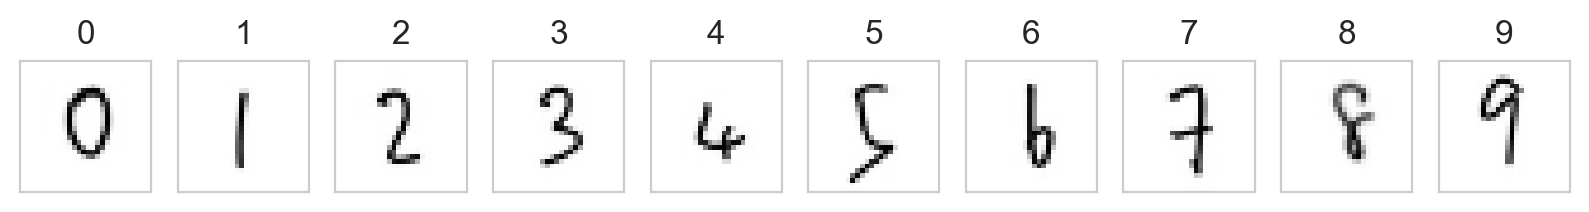

In [27]:
fig, axes = plt.subplots(1, 10, figsize=(10, 10), dpi=200)

predicted_my_hadwrite = model.predict_classes(my_images.reshape(10, 28, 28, 1))

for digit in range(0, 10):
    axes[digit].imshow(my_images[digit], cmap='Greys')
    axes[digit].set_title(predicted_my_hadwrite[digit])
    axes[digit].get_yaxis().set_visible(False)
    axes[digit].get_xaxis().set_visible(False)